# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [24]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = ("C:\\Users\\cloes\\OneDrive\\Desktop\\Analysis Projects\\PyBer_Analysis\\Resources\\city_data.csv")
ride_data_to_load = ("C:\\Users\\cloes\\OneDrive\\Desktop\\Analysis Projects\\PyBer_Analysis\\Resources\\ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [25]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12


In [26]:
ride_data_df['date'] = pd.to_datetime(ride_data_df['date'])

In [28]:
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   city     2375 non-null   object        
 1   date     2375 non-null   datetime64[ns]
 2   fare     2375 non-null   float64       
 3   ride_id  2375 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 74.3+ KB


In [30]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [31]:
#  1. Get the total rides for each city type
total_rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [32]:
# 2. Get the total drivers for each city type
total_drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [33]:
#  3. Get the total amount of fares for each city type
total_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [34]:
#  4. Get the average fare per ride for each city type. 
avgfares_perride_by_city_type = total_fares_by_city_type / total_rides_by_city_type
avgfares_perride_by_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [35]:
# 5. Get the average fare per driver for each city type. 
avgfare_perdriver_by_city_type = total_fares_by_city_type / total_drivers_by_city_type
avgfare_perdriver_by_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [36]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
            "Total Rides": total_rides_by_city_type,
            "Total Drivers": total_drivers_by_city_type,
            "Total Fares": total_fares_by_city_type,
            "Average Fare per Ride": avgfares_perride_by_city_type,
            "Average Fare per Driver": avgfare_perdriver_by_city_type})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [37]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [38]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,}'.format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('${:,.2f}'.format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [39]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12,46,Urban


In [40]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_per_day = pyber_data_df.groupby(['date','type']).sum()[['fare']]
total_fare_per_day

,,fare
date,type,
2019-01-01 00:08:00,Urban,37.91
2019-01-01 00:46:00,Suburban,47.74
2019-01-01 02:07:00,Suburban,24.07
2019-01-01 03:46:00,Urban,7.57
2019-01-01 05:23:00,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:00,Urban,18.45
2019-05-08 07:29:00,Urban,18.55


In [41]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fare_per_day = total_fare_per_day.reset_index()
total_fare_per_day.head()

,date,type,fare
0,2019-01-01 00:08:00,Urban,37.91
1,2019-01-01 00:46:00,Suburban,47.74
2,2019-01-01 02:07:00,Suburban,24.07
3,2019-01-01 03:46:00,Urban,7.57
4,2019-01-01 05:23:00,Urban,10.75


In [42]:
total_fare_per_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2364 entries, 0 to 2363
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2364 non-null   datetime64[ns]
 1   type    2364 non-null   object        
 2   fare    2364 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 55.5+ KB


In [43]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fare_per_day_pivot = pd.pivot_table(total_fare_per_day, index='date', columns='type', values='fare')
total_fare_per_day_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [44]:
total_fare_per_day_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 13:10:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [45]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_dates = total_fare_per_day_pivot.loc['2019-01-01':'2019-04-29']
fare_dates

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:00,NaN,NaN,28.41
2019-04-29 21:20:00,NaN,NaN,13.59
2019-04-29 22:08:00,NaN,25.75,NaN


In [46]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
type(fare_dates.index)

fare_dates.index = pd.to_datetime(fare_dates.index)
fare_dates.index

DatetimeIndex(['2019-01-01 00:08:00', '2019-01-01 00:46:00',
               '2019-01-01 02:07:00', '2019-01-01 03:46:00',
               '2019-01-01 05:23:00', '2019-01-01 09:45:00',
               '2019-01-01 12:32:00', '2019-01-01 14:40:00',
               '2019-01-01 14:42:00', '2019-01-01 14:52:00',
               ...
               '2019-04-29 11:39:00', '2019-04-29 13:54:00',
               '2019-04-29 16:20:00', '2019-04-29 17:04:00',
               '2019-04-29 19:55:00', '2019-04-29 20:54:00',
               '2019-04-29 21:20:00', '2019-04-29 22:08:00',
               '2019-04-29 23:05:00', '2019-04-29 23:10:00'],
              dtype='datetime64[ns]', name='date', length=2204, freq=None)

In [47]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-29 23:10:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [48]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_dates_res = fare_dates.resample('W').sum()
fare_dates_res

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


Text(0.5, 1.0, 'Total Fare by City Type')

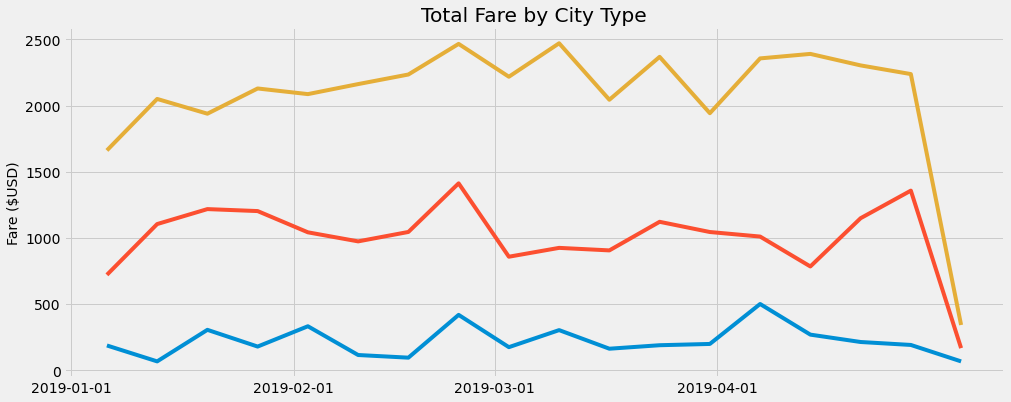

In [49]:
# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(fare_dates_res)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xticks(pd.date_range(start = "2019-01-01", end = "2019-04-30", freq="MS"))
ax.set_title("Total Fare by City Type")